In [1]:
#importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
train=pd.read_csv("Credit_card_train.csv")
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
#lets check the information about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


here we can see that what all the types of columns we have

In [4]:
#lets check the shape of the dataset
train.shape

(245725, 11)

In [5]:
#lets check the null values
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In credit product columns we have lots of null values 

In [6]:
#lets drop the null values 

In [7]:
train.dropna(inplace=True)

In [8]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

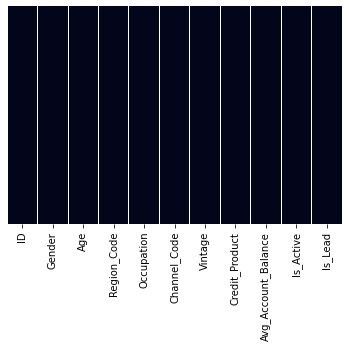

In [9]:
#ploting the graph after the cleaning null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [10]:
#removing Id columns because there won't have any use of that column

In [11]:
train.drop(['ID'],axis=1,inplace=True)

as we can see that there is no null vlaues present in the dataset

In [12]:
#lets check the correlation

In [13]:
dfcor=train.corr()
dfcor

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.638081,0.142724,0.175344
Vintage,0.638081,1.000000,0.159411,0.223750
Avg_Account_Balance,0.142724,0.159411,1.000000,0.042533
Is_Lead,0.175344,0.223750,0.042533,1.000000


In [14]:
#lets plot the graph to understand better

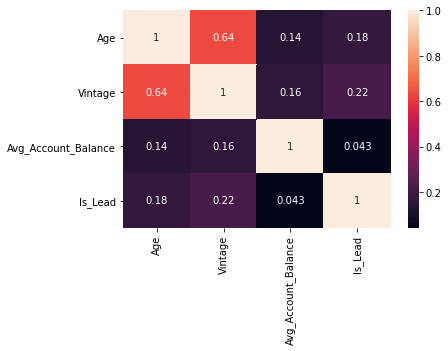

In [15]:
sns.heatmap(dfcor,annot=True)

In [16]:
#lets understand the table by meassuring it

In [17]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,216400.000000,216400.000000,2.164000e+05,216400.000000
mean,42.807315,44.285522,1.115086e+06,0.153942
std,14.850996,31.235351,8.500172e+05,0.360894
min,23.000000,7.000000,2.079000e+04,0.000000
25%,29.000000,20.000000,5.958438e+05,0.000000
50%,41.000000,31.000000,8.805390e+05,0.000000
75%,53.000000,67.000000,1.346543e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [18]:
#lets explore the categorical columns

# Exploring Categorical columns

In [19]:
for i in train.columns:
    if train[i].dtype=='object':
        print(str(i)+ ':' +str(train[i].unique()))
        print("***********************************************************************")
        print("\n")

Gender:['Female' 'Male']
***********************************************************************


Region_Code:['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
***********************************************************************


Occupation:['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
***********************************************************************


Channel_Code:['X3' 'X1' 'X2' 'X4']
***********************************************************************


Credit_Product:['No' 'Yes']
***********************************************************************


Is_Active:['No' 'Yes']
***********************************************************************




# Univariate Analysis

In [20]:
#lets check the columns first
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [21]:
def cate_col(col):
    c=train.columns
    for i in c:
        if train[i].dtypes=='object':
            sns.set_style("darkgrid")
            d=train[i].value_counts()
            print(d)
            sns.countplot(train[i],data=train)
            plt.plot(d,color='g',label=d)
            plt.legend()
            plt.show()
            print("**************************************************************************************")
            print("\n")

Male      115919
Female    100481
Name: Gender, dtype: int64


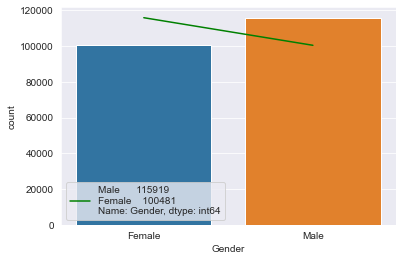

**************************************************************************************


RG268    30313
RG283    24663
RG254    24100
RG284    16354
RG277    11315
RG280    11277
RG270     7249
RG261     7054
RG269     6988
RG257     5529
RG282     5254
RG251     5235
RG274     4905
RG272     4655
RG281     4533
RG252     4056
RG273     3932
RG279     3556
RG263     3315
RG275     2999
RG260     2803
RG256     2661
RG264     2626
RG276     2356
RG259     2349
RG250     2323
RG255     1801
RG258     1728
RG262     1636
RG278     1617
RG253     1592
RG266     1484
RG271     1424
RG267     1386
RG265     1332
Name: Region_Code, dtype: int64


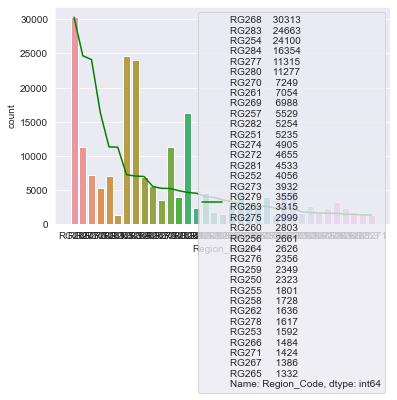

**************************************************************************************


Self_Employed    86120
Salaried         67783
Other            60846
Entrepreneur      1651
Name: Occupation, dtype: int64


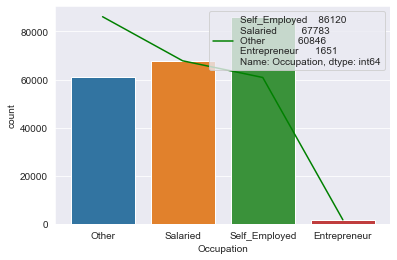

**************************************************************************************


X1    100660
X2     55892
X3     54995
X4      4853
Name: Channel_Code, dtype: int64


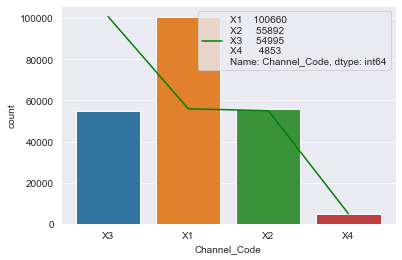

**************************************************************************************


No     144357
Yes     72043
Name: Credit_Product, dtype: int64


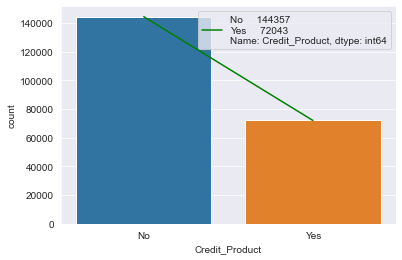

**************************************************************************************


No     134866
Yes     81534
Name: Is_Active, dtype: int64


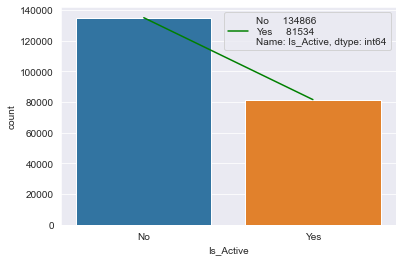

**************************************************************************************




In [22]:
cate_col(train)

In [23]:
#Vintage
train['Vintage'].value_counts()

13     11547
14     11526
21     11506
15     11457
19     11426
       ...  
129      424
128      408
135       17
133       16
134        9
Name: Vintage, Length: 66, dtype: int64

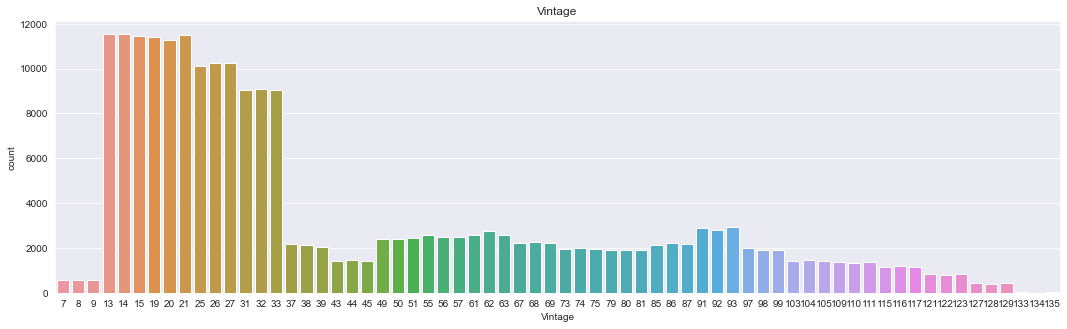

In [24]:
#Vintage
plt.figure(figsize=(18,5))
sns.countplot(x='Vintage',data=train)
plt.title('Vintage')
plt.show()

In [25]:
#Age
train['Age'].value_counts()

28    14289
29    13011
27    12810
30    10847
26     8908
      ...  
82      608
83      561
84      511
85      481
23        1
Name: Age, Length: 63, dtype: int64

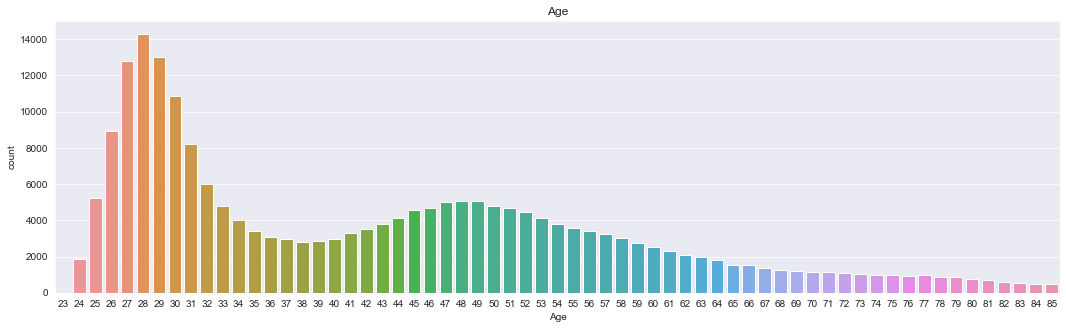

In [26]:
#Age
plt.figure(figsize=(18,5))
sns.countplot(x='Age',data=train)
plt.title('Age')
plt.show()

In [27]:
#Is_Lead
train['Is_Lead'].value_counts()

0    183087
1     33313
Name: Is_Lead, dtype: int64

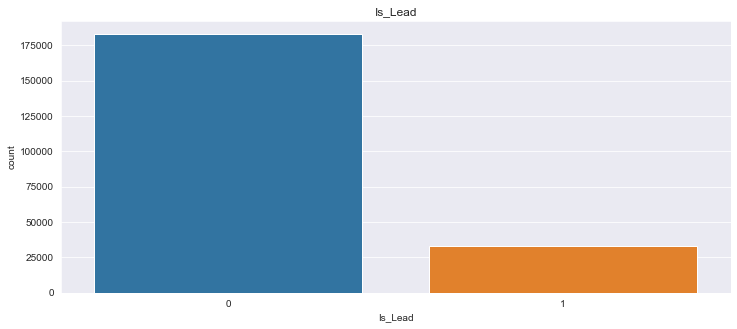

In [28]:
#Is_Lead
plt.figure(figsize=(12,5))
sns.countplot(x='Is_Lead',data=train)
plt.title('Is_Lead')
plt.show()

# Bivariate Analysis

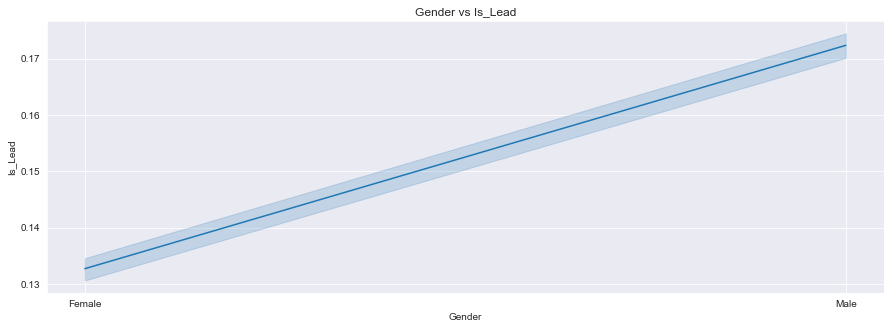

In [29]:
#Gender vs Is_Lead
plt.figure(figsize=(15,5))
sns.lineplot(x='Gender',y='Is_Lead',data=train)
plt.title("Gender vs Is_Lead")
plt.xlabel('Gender')
plt.ylabel('Is_Lead')
plt.show()

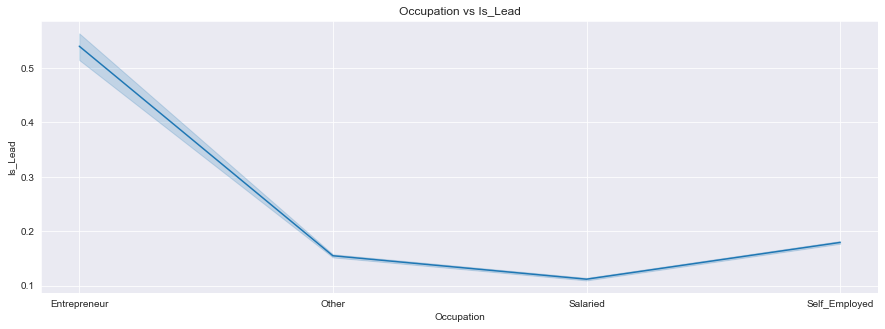

In [30]:
#Occupation vs Is_Lead
plt.figure(figsize=(15,5))
sns.lineplot(x='Occupation',y='Is_Lead',data=train)
plt.title("Occupation vs Is_Lead")
plt.xlabel('Occupation')
plt.ylabel('Is_Lead')
plt.show()

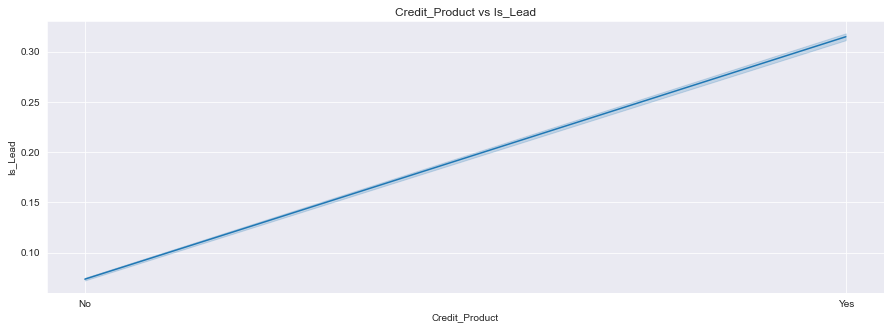

In [31]:
#Credit_Product vs Is_Lead
plt.figure(figsize=(15,5))
sns.lineplot(x='Credit_Product',y='Is_Lead',data=train)
plt.title("Credit_Product vs Is_Lead")
plt.xlabel('Credit_Product')
plt.ylabel('Is_Lead')
plt.show()

# Checking Skewness

In [32]:
train.skew()

Age                    0.718902
Vintage                0.965320
Avg_Account_Balance    3.011783
Is_Lead                1.917802
dtype: float64

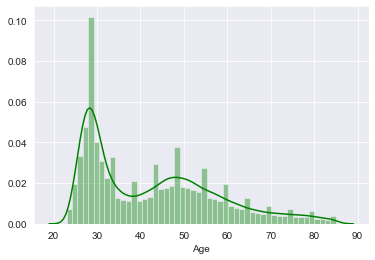

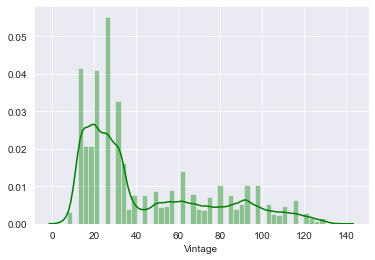

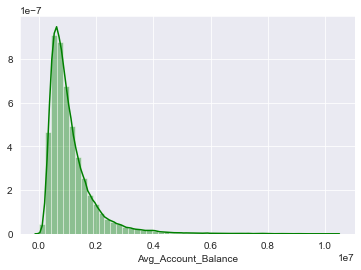

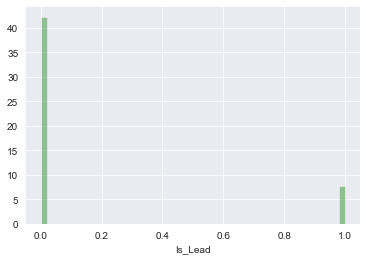

In [33]:
#lets plot the skewness
for i in train.describe().columns:
    sns.distplot(train[i],color='g')
    plt.show()

In [34]:
#treating skewness with square root and cube root method
for i in train.skew().index:
    if train[i].skew()>0.55:
        train[i]=np.sqrt(train[i])
    if train[i].skew()<-0.55:
        train[i]=np.cbrt(train[i])

In [35]:
train.skew()

Age                    0.476791
Vintage                0.620577
Avg_Account_Balance    1.400220
Is_Lead                1.917802
dtype: float64

In [36]:
#Now we need to convert all the categrical columns into Numerical

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=le.fit_transform(train[i])

In [39]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,8.544004,18,1,2,6.557439,0,1022.592783,0,0.0
1,0,5.477226,27,2,0,5.656854,0,762.881380,0,0.0
2,0,7.483315,18,3,2,5.099020,0,1218.324669,1,0.0
3,1,5.830952,20,2,0,4.358899,0,685.896494,0,0.0
4,0,5.477226,32,2,0,5.744563,0,941.693687,0,0.0


As we are converted all the columns into Numerical columns

# Checking Outliers

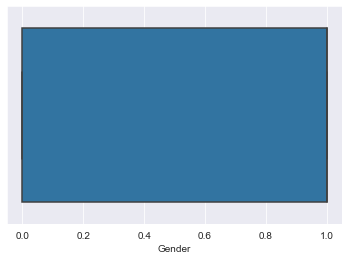

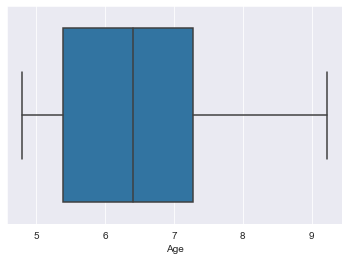

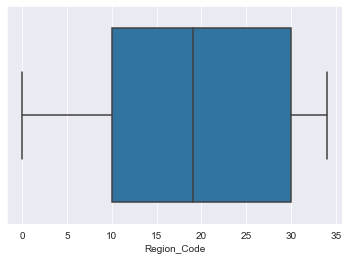

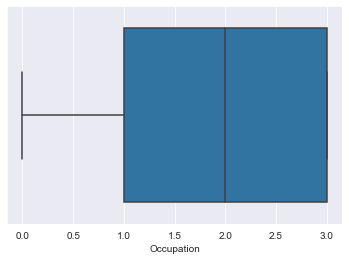

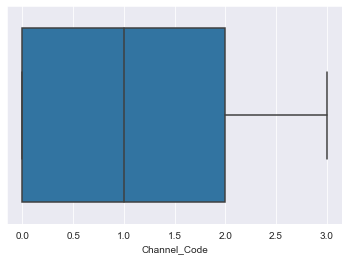

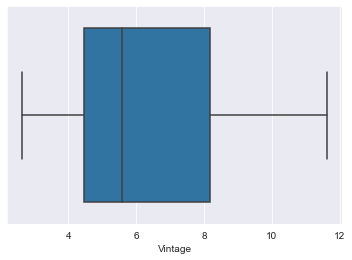

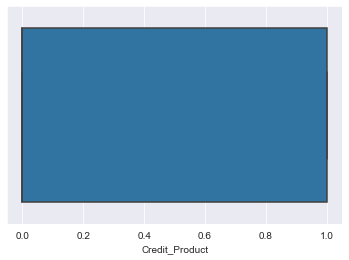

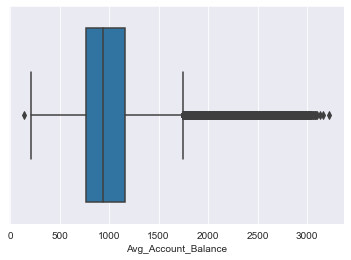

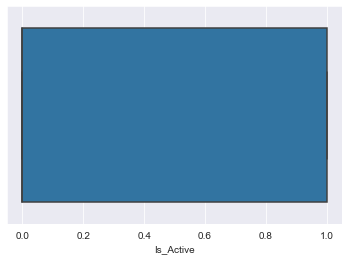

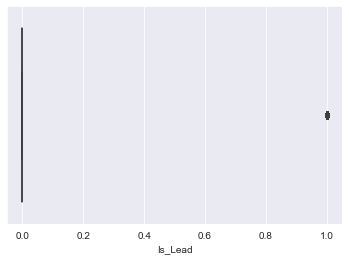

In [40]:
for i in train.columns:
    sns.boxplot(train[i],data=train)
    plt.show()

Here we can see that only some columns have outliers

In [41]:
#Treating outliers

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[1.07407681, 1.89962231, 0.15350332, ..., 0.06219292, 0.77753176,
        0.42655803],
       [1.07407681, 0.88130781, 0.67411962, ..., 0.71587407, 0.77753176,
        0.42655803],
       [1.07407681, 0.93779796, 0.15350332, ..., 0.64858427, 1.2861211 ,
        0.42655803],
       ...,
       [1.07407681, 1.22426207, 1.04195204, ..., 0.54793538, 0.77753176,
        0.42655803],
       [1.07407681, 1.04971991, 0.30628721, ..., 1.08892532, 0.77753176,
        0.42655803],
       [0.93103211, 0.96478779, 0.06154521, ..., 0.18227183, 0.77753176,
        0.42655803]])

In [43]:
threshold=3
print(np.where(z>3))

(array([    98,    162,    187, ..., 216325, 216337, 216378], dtype=int64), array([7, 7, 7, ..., 7, 7, 7], dtype=int64))


In [44]:
train_new=train[(z<3).all(axis=1)]

In [45]:
print(train.shape ,'\t\t' ,train_new.shape)

(216400, 10) 		 (213172, 10)


In [46]:
#Lets import the Test data and analyse the dataset

# Test DataSet

In [47]:
test=pd.read_csv("Credit_card_Test.csv")
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [48]:
#lets check the shape of the dataset
test.shape

(105312, 10)

In [49]:
#lets remove the id columns because we will not get any information from it

In [50]:
test.drop(['ID'],axis=1,inplace=True)
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [51]:
#lets check the information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               105312 non-null  object
 1   Age                  105312 non-null  int64 
 2   Region_Code          105312 non-null  object
 3   Occupation           105312 non-null  object
 4   Channel_Code         105312 non-null  object
 5   Vintage              105312 non-null  int64 
 6   Credit_Product       92790 non-null   object
 7   Avg_Account_Balance  105312 non-null  int64 
 8   Is_Active            105312 non-null  object
dtypes: int64(3), object(6)
memory usage: 7.2+ MB


In [52]:
#lets check the null values
test.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [53]:
#lets remove the null values
test.dropna(inplace=True)

In [54]:
#lets check it again
test.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

Now we have removed the null values

In [55]:
#lets check the correlation

In [56]:
cor=test.corr()
cor

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.629093,0.133499
Vintage,0.629093,1.000000,0.155273
Avg_Account_Balance,0.133499,0.155273,1.000000


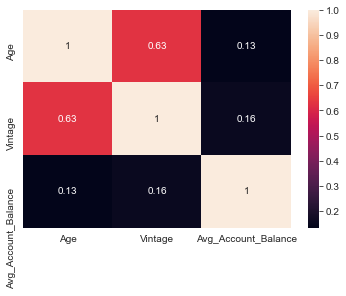

In [57]:
sns.heatmap(cor,annot=True)

In [58]:
#lets check the meassured values
test.describe()

,Age,Vintage,Avg_Account_Balance
count,92790.000000,92790.000000,9.279000e+04
mean,42.821382,44.146298,1.120936e+06
std,14.889702,31.153780,8.637829e+05
min,24.000000,7.000000,2.259700e+04
25%,29.000000,20.000000,5.946418e+05
50%,41.000000,31.000000,8.828575e+05
75%,53.000000,67.000000,1.353427e+06
max,85.000000,135.000000,9.908858e+06


# Univariate Analysis

In [59]:
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No
5,Male,60,RG268,Self_Employed,X3,110,No,4624262,No


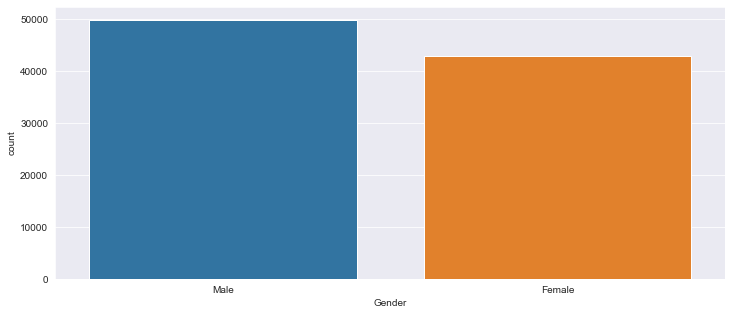

In [60]:
#Gender
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',data=test)
plt.show()

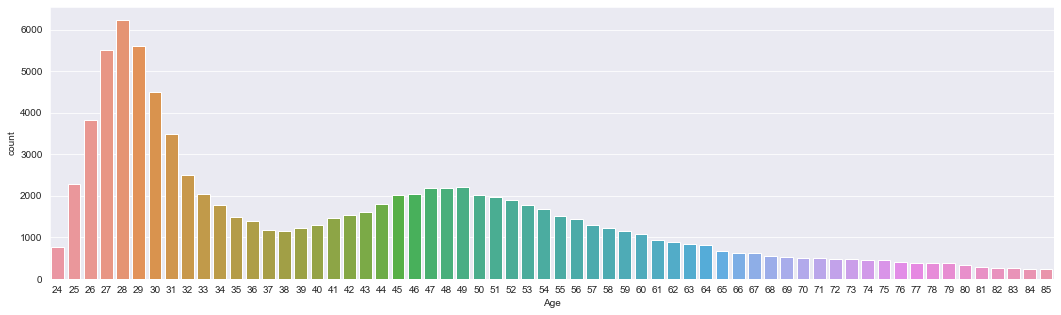

In [61]:
#Age
plt.figure(figsize=(18,5))
sns.countplot(x='Age',data=test)
plt.show()

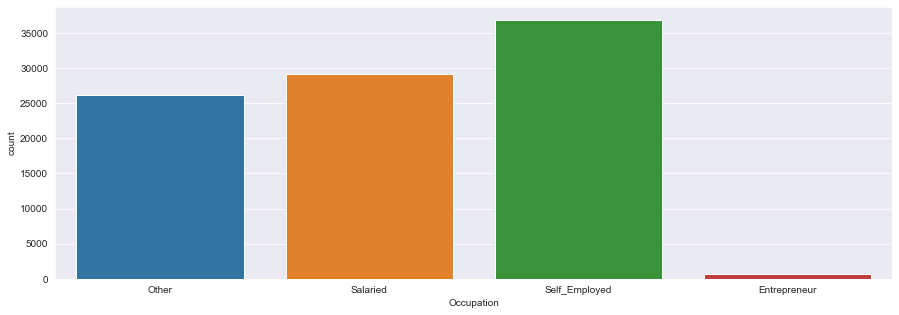

In [62]:
#Occupation	
plt.figure(figsize=(15,5))
sns.countplot(x='Occupation',data=test)
plt.show()

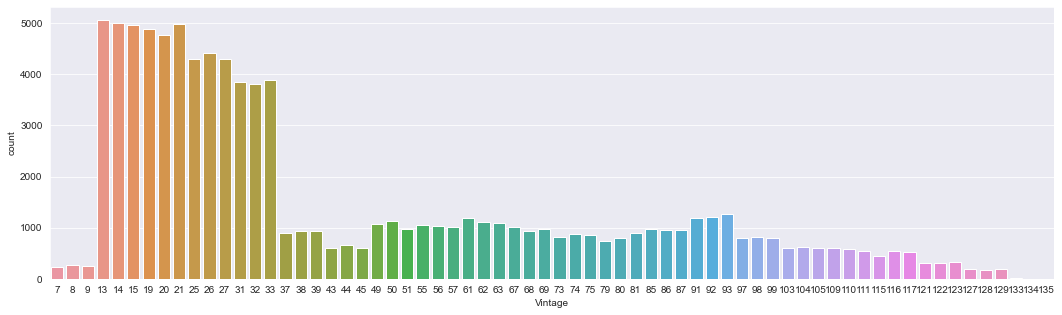

In [63]:
#Vintage
plt.figure(figsize=(18,5))
sns.countplot(x='Vintage',data=test)
plt.show()

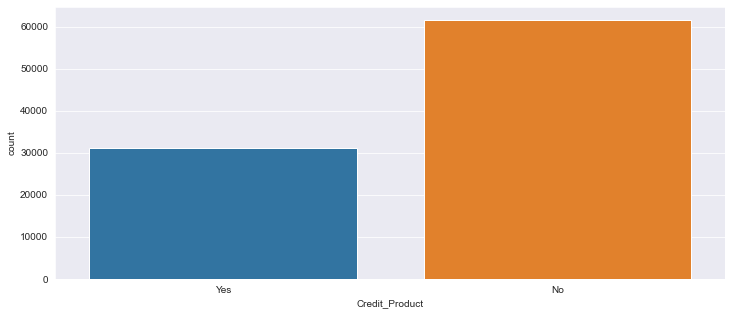

In [64]:
#Credit_Product
plt.figure(figsize=(12,5))
sns.countplot(x='Credit_Product',data=test)
plt.show()

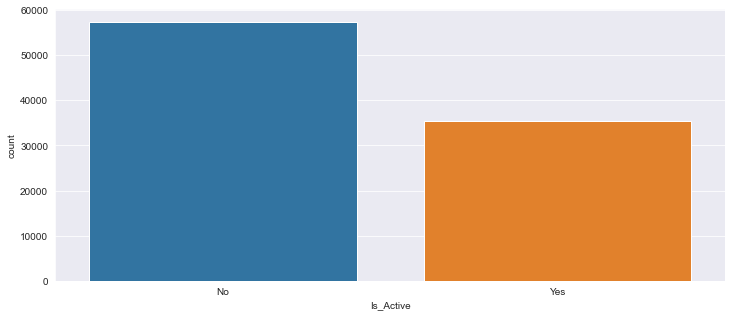

In [65]:
#Is_Active
plt.figure(figsize=(12,5))
sns.countplot(x='Is_Active',data=test)
plt.show()

# Bivariate Analysis

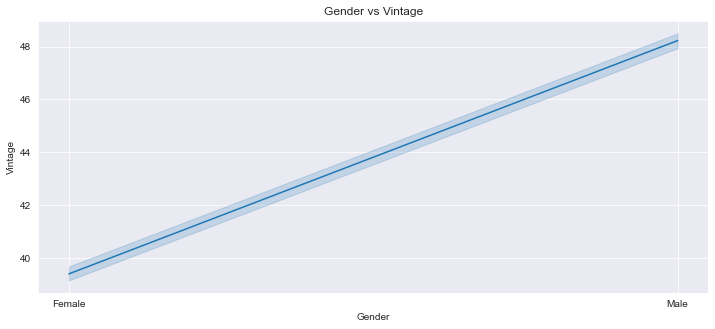

In [66]:
#Gender vs Vintage
plt.figure(figsize=(12,5))
sns.lineplot(x='Gender',y='Vintage',data=test)
plt.title("Gender vs Vintage")
plt.xlabel('Gender')
plt.ylabel('Vintage')
plt.show()

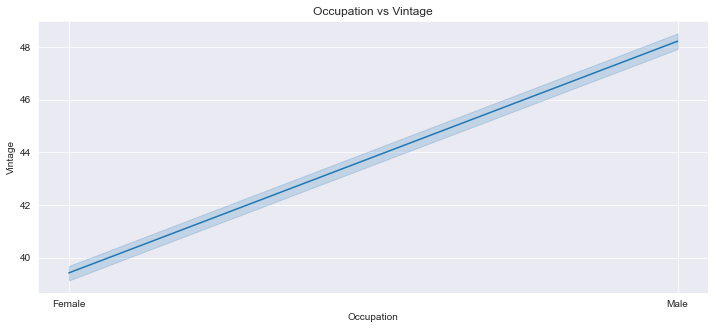

In [67]:
#Occupation vs Vintage
plt.figure(figsize=(12,5))
sns.lineplot(x='Gender',y='Vintage',data=test)
plt.title("Occupation vs Vintage")
plt.xlabel('Occupation')
plt.ylabel('Vintage')
plt.show()

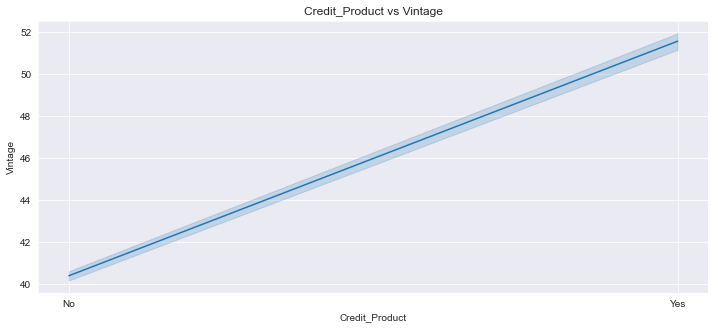

In [68]:
#Credit_Product vs Vintage
plt.figure(figsize=(12,5))
sns.lineplot(x='Credit_Product',y='Vintage',data=test)
plt.title("Credit_Product vs Vintage")
plt.xlabel('Credit_Product')
plt.ylabel('Vintage')
plt.show()

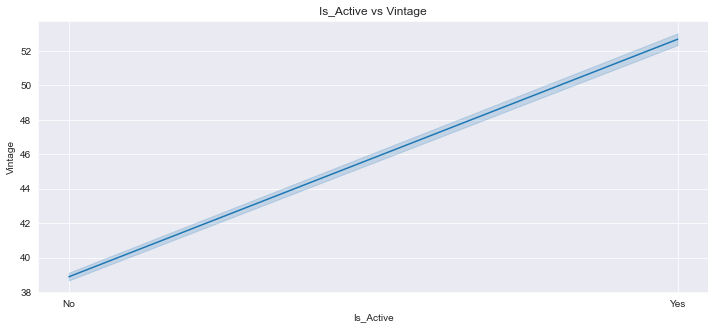

In [69]:
#Is_Active vs Vintage
plt.figure(figsize=(12,5))
sns.lineplot(x='Is_Active',y='Vintage',data=test)
plt.title("Is_Active vs Vintage")
plt.xlabel('Is_Active')
plt.ylabel('Vintage')
plt.show()

In [70]:
#lets check the skewness of the test dataset
test.skew()

Age                    0.727184
Vintage                0.965641
Avg_Account_Balance    3.043202
dtype: float64

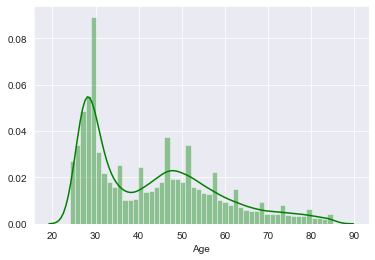

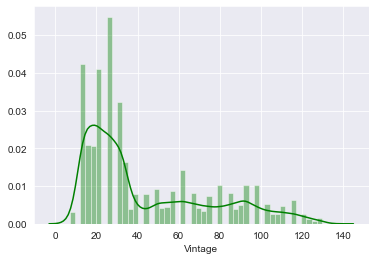

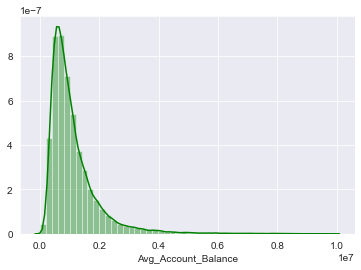

In [71]:
#lets plot the skewness
for i in test.describe().columns:
    sns.distplot(test[i],color='g')
    plt.show()

In [72]:
#treating skewness with square root and cube root method
for i in test.skew().index:
    if test[i].skew()>0.55:
        test[i]=np.sqrt(test[i])
    if test[i].skew()<-0.55:
        test[i]=np.cbrt(test[i])

In [73]:
test.skew()

Age                    0.483092
Vintage                0.620362
Avg_Account_Balance    1.422967
dtype: float64

In [74]:
#lets convert all the categorical columns into numerical columns

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()
for i in test.columns:
    if test[i].dtype=='object':
        test[i]=le.fit_transform(test[i])

In [77]:
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,5.385165,4,1,0,5.000000,1,861.606639,0
2,1,5.567764,20,2,0,3.741657,0,464.703131,0
3,1,5.385165,22,1,0,5.744563,0,931.702742,0
4,0,5.385165,20,1,0,4.358899,0,810.609030,0
5,1,7.745967,18,3,2,10.488088,0,2150.409728,0


In [78]:
#lets check the outliers

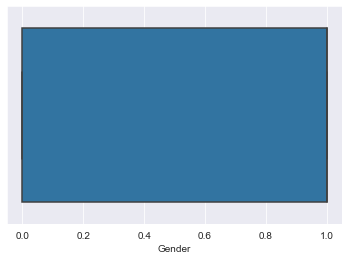

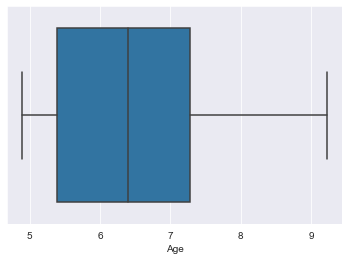

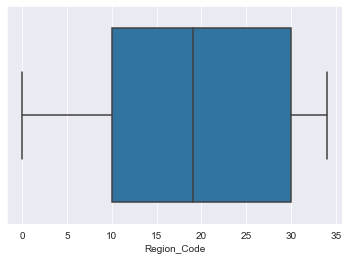

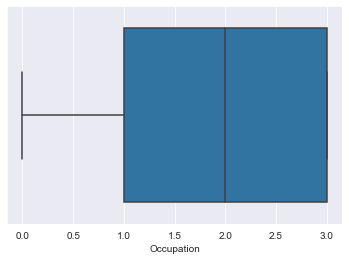

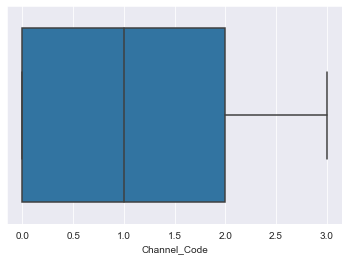

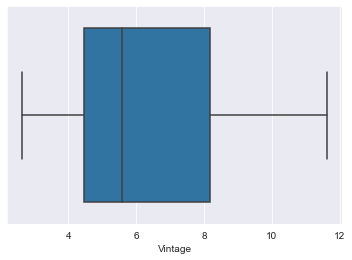

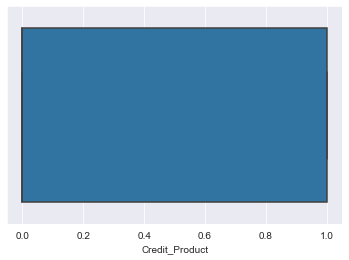

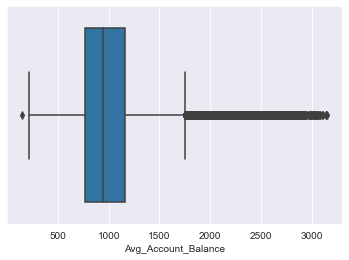

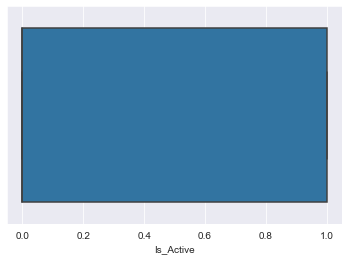

In [79]:
for i in test.columns:
    sns.boxplot(test[i],data=test)
    plt.show()

In [80]:
#Lets split the data of from the train dataset

In [81]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,8.544004,18,1,2,6.557439,0,1022.592783,0,0.0
1,0,5.477226,27,2,0,5.656854,0,762.881380,0,0.0
2,0,7.483315,18,3,2,5.099020,0,1218.324669,1,0.0
3,1,5.830952,20,2,0,4.358899,0,685.896494,0,0.0
4,0,5.477226,32,2,0,5.744563,0,941.693687,0,0.0


In [82]:
x=train.iloc[:,:-1]
x.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,8.544004,18,1,2,6.557439,0,1022.592783,0
1,0,5.477226,27,2,0,5.656854,0,762.881380,0
2,0,7.483315,18,3,2,5.099020,0,1218.324669,1
3,1,5.830952,20,2,0,4.358899,0,685.896494,0
4,0,5.477226,32,2,0,5.744563,0,941.693687,0


In [83]:
y=train.iloc[:,-1]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Is_Lead, dtype: float64

In [84]:
#we have splited the data into x and y variable

# Model Prediction

In [85]:
#lets do the train test split
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [87]:
#lets check the shape of the X_train,X_test,y_train,y_test

In [88]:
print("The shape of x_train :",X_train.shape)
print("The shape of x_test :",X_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of x_train : (151480, 9)
The shape of x_test : (64920, 9)
The shape of y_train : (151480,)
The shape of y_test : (64920,)


In [89]:
#lets import all the required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing All the Bossting models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import roc_auc_score, roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [90]:
#LogisticRegression

In [91]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
lg_pred=lg.predict(X_test)
print(accuracy_score(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))
print(classification_report(y_test,lg_pred))

0.8474121996303142
[[53935   952]
 [ 8954  1079]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     54887
         1.0       0.53      0.11      0.18     10033

    accuracy                           0.85     64920
   macro avg       0.69      0.55      0.55     64920
weighted avg       0.81      0.85      0.80     64920



In [92]:
#GaussianNB

In [93]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred=gnb.predict(X_test)
print(accuracy_score(y_test,gnb_pred))
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

0.8049137399876771
[[48167  6720]
 [ 5945  4088]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     54887
         1.0       0.38      0.41      0.39     10033

    accuracy                           0.80     64920
   macro avg       0.63      0.64      0.64     64920
weighted avg       0.81      0.80      0.81     64920



In [94]:
#Decision Tree Classifier

In [95]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred=dtc.predict(X_test)
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.7887861983980283
[[47679  7208]
 [ 6504  3529]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     54887
         1.0       0.33      0.35      0.34     10033

    accuracy                           0.79     64920
   macro avg       0.60      0.61      0.61     64920
weighted avg       0.79      0.79      0.79     64920



In [96]:
#KNeighbors Classifier()

In [97]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_pred=KNN.predict(X_test)
print(accuracy_score(y_test,KNN_pred))
print(confusion_matrix(y_test,KNN_pred))
print(classification_report(y_test,KNN_pred))

0.8282809611829944
[[52605  2282]
 [ 8866  1167]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90     54887
         1.0       0.34      0.12      0.17     10033

    accuracy                           0.83     64920
   macro avg       0.60      0.54      0.54     64920
weighted avg       0.78      0.83      0.79     64920



In [98]:
#Lets use ensemble technique to improve the score

In [99]:
#RandomForestClassifier

In [100]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

0.852064078866297
[[52739  2148]
 [ 7456  2577]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     54887
         1.0       0.55      0.26      0.35     10033

    accuracy                           0.85     64920
   macro avg       0.71      0.61      0.63     64920
weighted avg       0.83      0.85      0.83     64920



In [101]:
#AdaBoost Classifier

In [102]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
print(accuracy_score(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))
print(classification_report(y_test,ada_pred))

0.8542821934688848
[[53619  1268]
 [ 8192  1841]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     54887
         1.0       0.59      0.18      0.28     10033

    accuracy                           0.85     64920
   macro avg       0.73      0.58      0.60     64920
weighted avg       0.82      0.85      0.82     64920



In [103]:
#GradientBoostingClassifier

In [104]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred=gbc.predict(X_test)
print(accuracy_score(y_test,gbc_pred))
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

0.8613832409118916
[[54029   858]
 [ 8141  1892]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     54887
         1.0       0.69      0.19      0.30     10033

    accuracy                           0.86     64920
   macro avg       0.78      0.59      0.61     64920
weighted avg       0.84      0.86      0.83     64920



In [105]:
#lets use cross validation

In [106]:
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
      AdaBoostClassifier(),GradientBoostingClassifier()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('model:',m)
    print('score:',score)
    print('mean score:',score.mean())
    print('standard deviation:',score.std())
    print("*********************************************************************************************")
    print("\n")

model: LogisticRegression()
score: [0.84759704 0.84861368 0.84773567 0.84921442 0.84625693 0.84500924
 0.8478281  0.84907579 0.84745841 0.84801294]
mean score: 0.8476802218114603
standard deviation: 0.001205169930698912
*********************************************************************************************


model: GaussianNB()
score: [0.80716266 0.81192237 0.80878004 0.80711645 0.80485213 0.80878004
 0.80720887 0.8064695  0.80660813 0.80531423]
mean score: 0.8074214417744917
standard deviation: 0.0019174052657822335
*********************************************************************************************


model: DecisionTreeClassifier()
score: [0.78719963 0.78636784 0.79219039 0.78904806 0.78867837 0.78807763
 0.79445471 0.79098891 0.79390018 0.787939  ]
mean score: 0.7898844731977819
standard deviation: 0.0026894044050803675
*********************************************************************************************


model: KNeighborsClassifier()
score: [0.82957486 0.830

# Roc Auc Curve

In [107]:
#Lets check the Roc Auc Curve in every model

In [108]:
#Roc Auc in LogisticRegression

Text(0.5, 1.0, 'Logistic Regression')

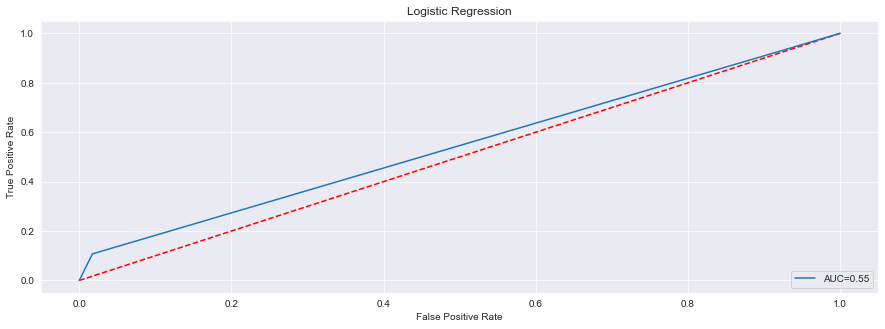

In [109]:
f,ax=plt.subplots(figsize=(15,5))
# Calculate fpr, tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,lg_pred)

ax.plot([0,1],[0,1],'r--')
ax.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc_score(y_test,lg_pred))
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Logistic Regression')

In [110]:
#ROC AUC GaussianNB

Text(0.5, 1.0, 'GaussianNB')

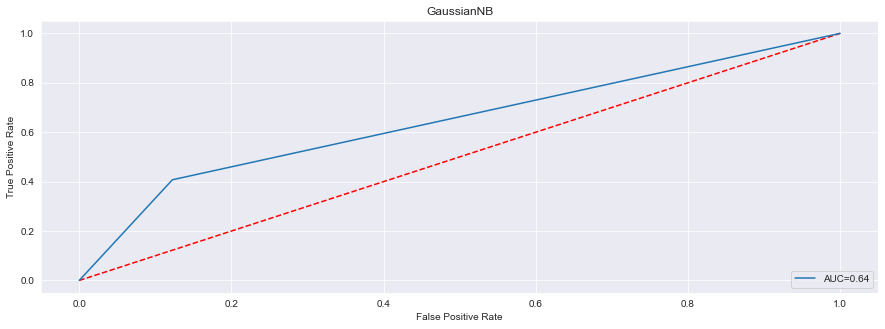

In [111]:
f,ax=plt.subplots(figsize=(15,5))
# Calculate fpr, tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,gnb_pred)

ax.plot([0,1],[0,1],'r--')
ax.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc_score(y_test,gnb_pred))
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("GaussianNB")

In [112]:
#ROC AUC Curve Decision Tree Classifier

Text(0.5, 1.0, 'Decision Tree Classifier')

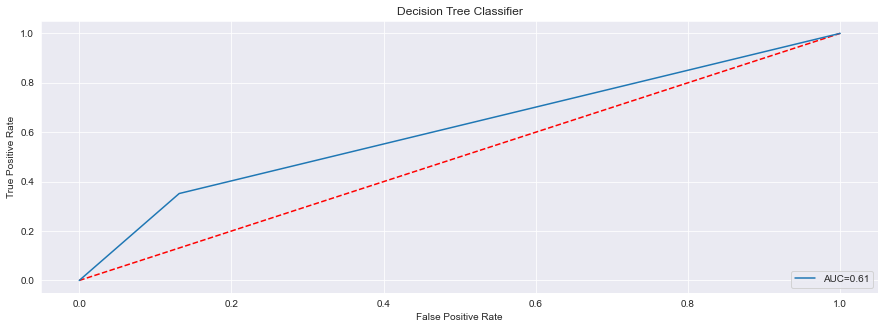

In [113]:
f,ax=plt.subplots(figsize=(15,5))
# Calculate fpr, tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,dtc_pred)

ax.plot([0,1],[0,1],'r--')
ax.plot(fpr,tpr,label='AUC=%0.2f'% roc_auc_score(y_test,dtc_pred))
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Decision Tree Classifier')

In [114]:
#ROC AUC CURVE KNeighborsClassifier

Text(0.5, 1.0, 'KNeighbors Classifier')

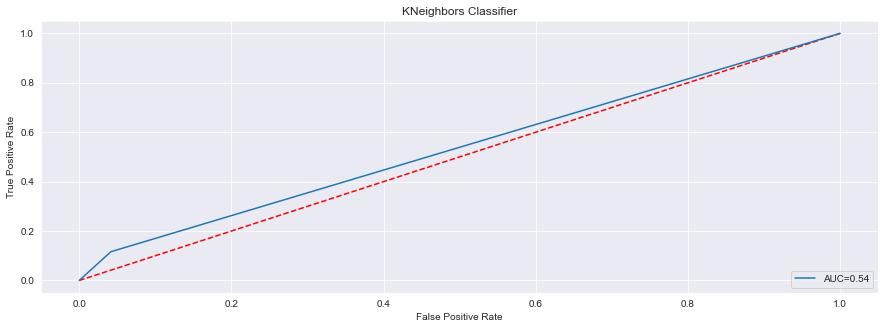

In [115]:
f,ax=plt.subplots(figsize=(15,5))
# Calculate fpr, tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,KNN_pred)

ax.plot([0,1],[0,1],'r--')
ax.plot(fpr,tpr,label='AUC=%0.2f'% roc_auc_score(y_test,KNN_pred))
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('KNeighbors Classifier')

# Final Model Selection

In [116]:
#we have selected the Gradient Bossting as best model

In [117]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred=gbc.predict(X_test)
print(accuracy_score(y_test,gbc_pred))
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

0.8613832409118916
[[54029   858]
 [ 8141  1892]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     54887
         1.0       0.69      0.19      0.30     10033

    accuracy                           0.86     64920
   macro avg       0.78      0.59      0.61     64920
weighted avg       0.84      0.86      0.83     64920



In [118]:
#lets use the confusion matrix to plot our best model

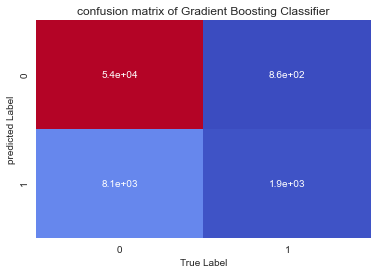

In [119]:
#confusion matrix 

cm=confusion_matrix(y_test,gbc_pred)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')
plt.xlabel("True Label")
plt.ylabel("predicted Label")
plt.title("confusion matrix of Gradient Boosting Classifier")
plt.show()

In [120]:
#importing the joblib to save the model

In [124]:
import joblib

In [138]:
#saving the pickle file
joblib.dump(gbc,'credit_card_gbc.pkl')

['credit_card_gbc.pkl']

In [139]:
#saving the predicted as csv
joblib.dump(gbc,'credit_card_gbc.csv')

['credit_card_gbc.csv']

In [140]:
#lets call the model and predict it
model=joblib.load('credit_card_gbc.csv')
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])